In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
data=pd.read_csv("C:/Users/Admin/Desktop/delivery.duplicate2.csv")
data

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75
5,7,330,18.11
6,2,110,8.00
7,7,210,17.83
8,30,1460,79.24
9,5,605,21.50


In [120]:
data.isnull()
data

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75
5,7,330,18.11
6,2,110,8.00
7,7,210,17.83
8,30,1460,79.24
9,5,605,21.50


{'whiskers': [<matplotlib.lines.Line2D at 0x13c96c02df0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c96c0e3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c96c02b20>],
 'medians': [<matplotlib.lines.Line2D at 0x13c96c0e910>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c96c0ebe0>],
 'means': []}

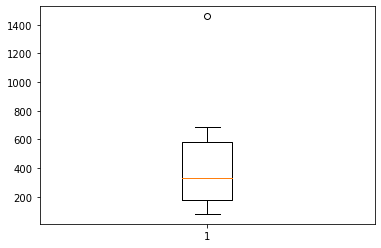

In [121]:
plt.boxplot(data['distance'])

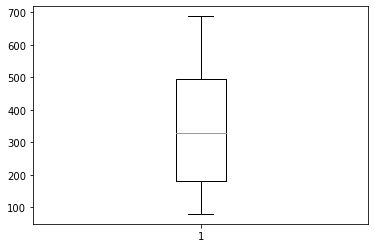

In [122]:
for i in data['distance']:
    q1=data['distance'].quantile(0.25)
    q3=data['distance'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    if i>upper_tail or i<lower_tail:
     data['distance']=data['distance'].replace(i,np.mean(data['distance']))
plt.boxplot(data['distance'])
plt.show()

In [123]:
from sklearn.preprocessing import StandardScaler
# finding the mean and std deviation of numerical columns
scaler = StandardScaler().fit(data[['n.prod','distance','delTime']]) 
# scaling columns to a common range
data_normalized = scaler.transform(data[['n.prod','distance','delTime']])# Scaled data 
#note that output is a 2-Dimensional array of normalized data
data_normalized


array([[-0.15192474,  1.11160065, -0.32797229],
       [-0.66613153, -0.59580865, -0.59353802],
       [-0.66613153,  0.0068064 , -0.56636624],
       [-0.53757983, -1.29885954, -0.42025382],
       [-0.28047644, -0.94733409, -0.47818611],
       [-0.15192474, -0.04341152, -0.25465974],
       [-0.79468323, -1.14820578, -0.77297433],
       [-0.15192474, -0.64602657, -0.26901464],
       [ 2.80476435,  0.46926779,  2.87932355],
       [-0.40902814,  1.33758129, -0.08086286],
       [ 1.00504056,  1.75439003,  0.88450448]])

In [124]:
#updating the numerical(normalized) data into the dataframe
data_normalized=pd.DataFrame(data_normalized,columns=['n.prod','distance','delTime'])
data_normalized=data_normalized.join(data[data.columns.drop(['n.prod','distance','delTime'])])
data_normalized

,n.prod,distance,delTime
0,-0.151925,1.111601,-0.327972
1,-0.666132,-0.595809,-0.593538
2,-0.666132,0.006806,-0.566366
3,-0.537580,-1.298860,-0.420254
4,-0.280476,-0.947334,-0.478186
5,-0.151925,-0.043412,-0.254660
6,-0.794683,-1.148206,-0.772974
7,-0.151925,-0.646027,-0.269015
8,2.804764,0.469268,2.879324
9,-0.409028,1.337581,-0.080863


(array([3., 2., 3., 1., 2.]),
 array([ 80. , 201.6, 323.2, 444.8, 566.4, 688. ]),
 <BarContainer object of 5 artists>)

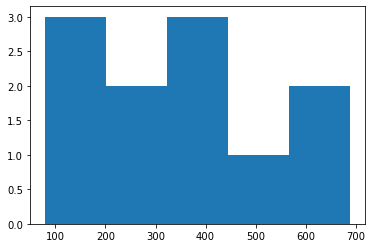

In [109]:
plt.hist(data['distance'],bins=)

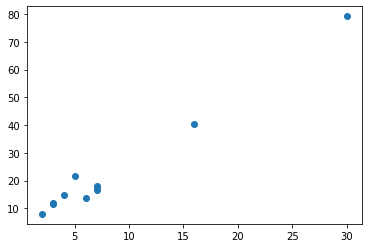

In [125]:
plt.scatter(data['n.prod'],data['delTime'])

In [110]:
# encoding categorical values
cat_features = ["n.prod","distance","delTime"]
data= pd.get_dummies(data,columns=cat_features)
print(data.columns)


Index(['n.prod_2', 'n.prod_3', 'n.prod_4', 'n.prod_5', 'n.prod_6', 'n.prod_7',
       'n.prod_16', 'n.prod_30', 'distance_80.0', 'distance_110.0',
       'distance_150.0', 'distance_210.0', 'distance_220.0', 'distance_330.0',
       'distance_340.0', 'distance_432.09090909090907', 'distance_560.0',
       'distance_605.0', 'distance_688.0', 'delTime_8.0', 'delTime_11.5',
       'delTime_12.03', 'delTime_13.75', 'delTime_14.88', 'delTime_16.68',
       'delTime_17.83', 'delTime_18.11', 'delTime_21.5', 'delTime_40.33',
       'delTime_79.24'],
      dtype='object')


In [131]:
data['lables'] = pd.cut(x=data['n.prod'], bins=[1, 20, 40, 60, 80, 100],
                    labels=['1 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100'])
 
print(data)
print(data['lables'].unique())

    n.prod    distance  delTime    lables
0        7  560.000000    16.68   1 to 20
1        3  220.000000    11.50   1 to 20
2        3  340.000000    12.03   1 to 20
3        4   80.000000    14.88   1 to 20
4        6  150.000000    13.75   1 to 20
5        7  330.000000    18.11   1 to 20
6        2  110.000000     8.00   1 to 20
7        7  210.000000    17.83   1 to 20
8       30  432.090909    79.24  21 to 40
9        5  605.000000    21.50   1 to 20
10      16  688.000000    40.33   1 to 20
['1 to 20', '21 to 40']
Categories (5, object): ['1 to 20' < '21 to 40' < '41 to 60' < '61 to 80' < '81 to 100']
